In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imgaug import augmenters as iaa

import tensorflow as tf

import cv2

from PIL import Image

from sklearn.preprocessing import StandardScaler


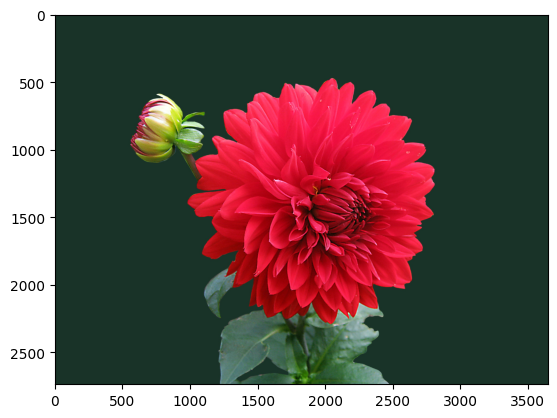

In [2]:
data = np.asarray(Image.open("./Data/Sample.jpg"))

plt.imshow(data)
plt.show()

In [3]:
def sliding_window(image, step, ws):
	# slide a window across the image
	for y in range(0, image.shape[0] - ws[1], step):
		for x in range(0, image.shape[1] - ws[0], step):
			# yield the current window
			yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [23]:
for i in sliding_window(data,224,[224,224]):
    plt.imshow(data[i])
    plt.show()

IndexError: index 25 is out of bounds for axis 2 with size 3

In [5]:
(data.shape[1]/1.5)

2432.0

In [17]:
def image_pyramid(data,scale=1.5,min_size=[224,224]):
    
    yield data

    while True:
        if (data.shape[0] < min_size[0] or data.shape[1] < min_size[1]):
            break
        else:
            width = int(data.shape[1]/scale)
            augment = iaa.Sequential([
                iaa.Resize(width)
            ])
            
            img = augment(images=[data])
            data = img[0] 
            
            
            yield img[0]

            

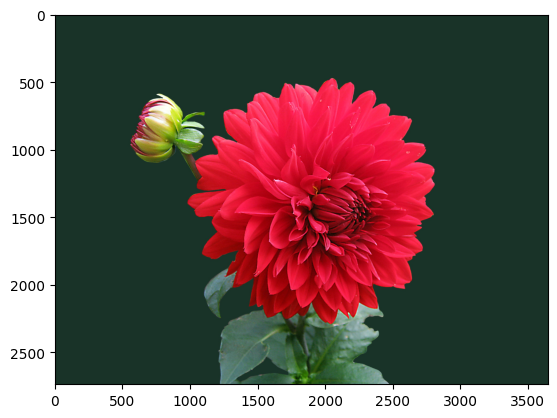

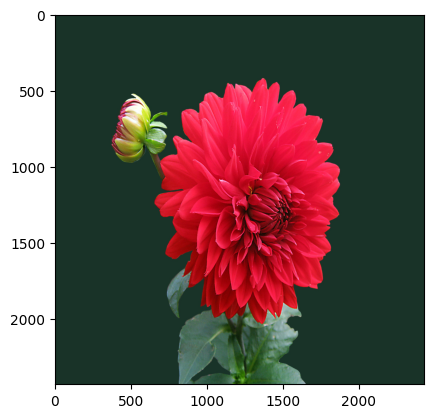

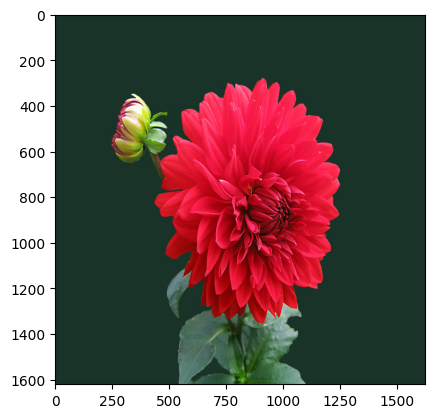

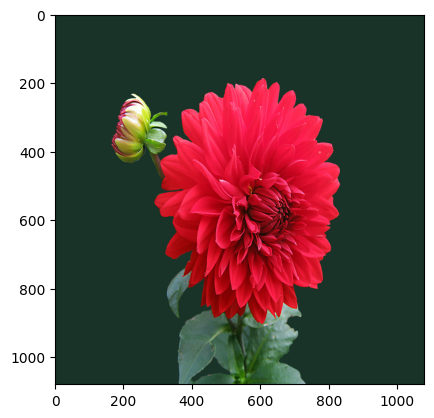

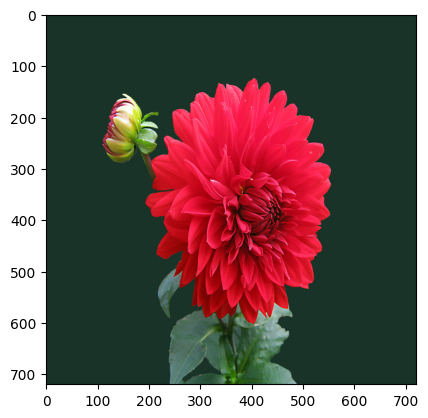

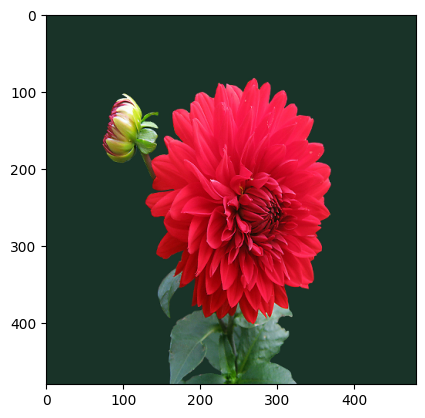

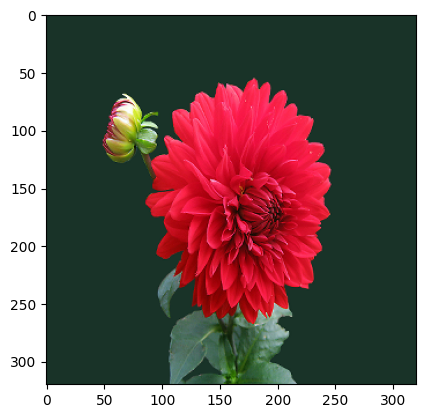

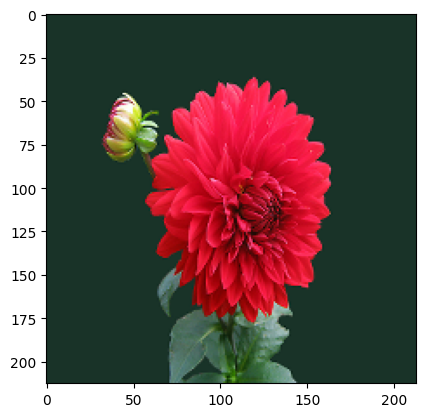

In [19]:
temp = []
for i in image_pyramid(data):
    temp.append(i)
    plt.imshow(i)
    plt.show()
    